In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

import matplotlib.cm as cm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer
import collections 
from sklearn.manifold import TSNE

import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

In [2]:
stock_price = pd.read_csv("./dataset/stock_price_table.csv", index_col = 0)
stock_price.columns = stock_price.columns.str.lstrip('price_')
stock_price.head()

,20070103,20070104,20070105,20070108,20070109,20070110,20070111,20070112,20070116,20070117,...,20151217,20151218,20151221,20151222,20151223,20151224,20151228,20151229,20151230,20151231
PERMNO,,,,,,,,,,,,,,,,,,,,,
10025,49.06,50.34,49.63,49.50,50.62,49.68,49.20,48.90,46.83,47.05,...,80.80,79.01,76.40,77.93,78.98,80.55,78.97,77.15,77.22,77.15
10026,41.02,41.89,39.66,40.42,40.54,41.54,41.41,42.23,41.71,41.28,...,114.37,112.69,112.92,114.53,115.90,118.21,117.64,119.37,119.25,116.67
10032,24.12,24.30,23.89,23.70,23.13,20.90,20.84,21.58,20.79,20.58,...,35.26,34.99,35.22,35.08,35.95,36.05,35.67,35.92,35.46,34.92
10051,7.40,7.33,7.52,7.44,7.51,7.52,7.45,7.60,7.83,7.82,...,17.53,16.77,16.52,17.08,17.29,17.38,16.96,16.95,16.85,16.45
10104,17.51,17.68,17.64,17.86,17.82,17.77,17.39,17.50,17.30,17.52,...,36.93,36.35,36.42,36.59,36.93,37.01,36.79,37.04,36.92,36.53


In [3]:
df_ret = stock_price.T.pct_change().T
df_ret = df_ret.drop(['20070103'], axis = 1)
df_ret.head()

,20070104,20070105,20070108,20070109,20070110,20070111,20070112,20070116,20070117,20070118,...,20151217,20151218,20151221,20151222,20151223,20151224,20151228,20151229,20151230,20151231
PERMNO,,,,,,,,,,,,,,,,,,,,,
10025,0.026091,-0.014104,-0.002619,0.022626,-0.018570,-0.009662,-0.006098,-0.042331,0.004698,-0.015515,...,-0.023447,-0.022153,-0.033034,0.020026,0.013474,0.019878,-0.019615,-0.023047,0.000907,-0.000907
10026,0.021209,-0.053235,0.019163,0.002969,0.024667,-0.003130,0.019802,-0.012314,-0.010309,0.035368,...,-0.011410,-0.014689,0.002041,0.014258,0.011962,0.019931,-0.004822,0.014706,-0.001005,-0.021635
10032,0.007463,-0.016872,-0.007953,-0.024051,-0.096412,-0.002871,0.035509,-0.036608,-0.010101,-0.029640,...,-0.008715,-0.007657,0.006573,-0.003975,0.024800,0.002782,-0.010541,0.007009,-0.012806,-0.015228
10051,-0.009459,0.025921,-0.010638,0.009409,0.001332,-0.009309,0.020134,0.030263,-0.001277,-0.007673,...,0.021562,-0.043354,-0.014908,0.033898,0.012295,0.005205,-0.024166,-0.000590,-0.005900,-0.023739
10104,0.009709,-0.002262,0.012472,-0.002240,-0.002806,-0.021384,0.006325,-0.011429,0.012717,-0.022831,...,-0.050887,-0.015705,0.001926,0.004668,0.009292,0.002166,-0.005944,0.006795,-0.003240,-0.010563


In [4]:
df_ret = df_ret.dropna()
df_ret.shape

(1844, 2265)

In [5]:
N_PRIN_COMPONENTS = 50
pca1 = PCA(n_components = N_PRIN_COMPONENTS)
pca1.fit(df_ret.T)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
pca1.components_.T.shape

(1844, 50)

In [7]:
reduced_price = pd.DataFrame(data = pca1.components_.T, index = df_ret.index)
reduced_price = reduced_price.add_prefix("P")
reduced_price.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49
PERMNO,,,,,,,,,,,,,,,,,,,,,
10025,-7.041245e-06,0.000046,-0.000303,0.000039,-0.000300,-0.019665,-0.002949,-0.002234,-0.002038,-0.002076,...,0.020455,0.002157,0.005990,-0.010744,-0.004581,-0.000325,-0.005782,-0.000685,-0.002234,0.001735
10026,4.427555e-06,0.000023,0.000025,0.000026,-0.000688,-0.014536,-0.002125,-0.001593,-0.000116,-0.001248,...,0.018223,0.003221,0.002225,-0.016033,-0.004929,-0.008863,-0.006643,0.009717,0.009040,0.001617
10032,1.497997e-06,0.000004,0.000100,0.000445,-0.000188,-0.024523,-0.004029,-0.001560,-0.000696,-0.001293,...,0.005129,0.004661,0.006755,-0.012971,-0.008308,0.001975,-0.003162,0.001981,-0.008559,0.008110
10051,2.064578e-06,-0.000026,0.000075,0.000041,-0.000098,-0.016408,-0.002557,-0.001023,0.000285,-0.001370,...,0.018129,0.003673,0.003527,-0.013858,0.004397,-0.005822,-0.009578,0.013933,-0.001578,0.001886
10104,-3.226356e-09,-0.000033,0.000090,0.000033,-0.000081,-0.016637,-0.001754,-0.002269,-0.000717,-0.000822,...,0.003208,0.000478,0.001636,-0.010258,-0.002387,-0.007980,-0.005116,0.005256,0.000216,-0.002872


In [8]:
ratios_data = pd.read_csv("./dataset/ratios_data_table.csv", index_col = 0)
ratios_data = ratios_data.dropna()
ratios_data.head()

,bm,pe_exi,npm,cfm,roa,roe,GProf,totdebt_invcap,capital_ratio,debt_ebitda,lt_debt,cash_debt,fcf_ocf,de_ratio,at_turn,ptb
permno,,,,,,,,,,,,,,,,
10025,0.273,13.679,0.025,0.054,0.210,0.308,0.484,0.710,0.702,2.296,0.602,0.201,0.827,3.910,2.573,3.534
10026,0.303,31.279,0.072,0.111,0.205,0.112,0.456,0.002,0.002,0.010,0.008,0.736,0.524,0.238,1.349,3.385
10032,0.659,12.745,0.036,0.054,0.100,0.115,0.169,0.239,0.235,1.588,0.301,0.089,0.542,1.021,1.603,1.364
10051,0.981,-548.330,-0.001,0.037,0.058,-0.002,0.058,0.553,0.524,7.474,0.658,0.061,0.373,1.675,0.834,1.216
10104,0.297,17.070,0.250,0.326,0.164,0.198,0.298,0.443,0.427,2.221,0.635,0.232,0.878,1.173,0.365,3.259


In [9]:
ratios_data.shape

(1591, 16)

In [10]:
N_PRIN_COMPONENTS = 5
pca2 = PCA(n_components = N_PRIN_COMPONENTS)
pca2.fit(ratios_data.T)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca2.components_.T.shape

(1591, 5)

In [12]:
reduced_ratio = pd.DataFrame(data = pca2.components_.T, index = ratios_data.index)
reduced_ratio = reduced_ratio.add_prefix("R")
reduced_ratio.head()

,R0,R1,R2,R3,R4
permno,,,,,
10025,0.004255,0.001993,0.003868,0.011551,0.002283
10026,0.010518,0.000616,-0.000830,0.011540,0.001873
10032,0.004160,0.000587,0.002900,0.003658,0.001659
10051,-0.187424,-0.012295,0.015351,0.031220,0.002623
10104,0.005573,0.000688,0.004190,0.010696,0.004456


In [13]:
X = reduced_price.join(reduced_ratio)
X.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P45,P46,P47,P48,P49,R0,R1,R2,R3,R4
PERMNO,,,,,,,,,,,,,,,,,,,,,
10025,-7.041245e-06,0.000046,-0.000303,0.000039,-0.000300,-0.019665,-0.002949,-0.002234,-0.002038,-0.002076,...,-0.000325,-0.005782,-0.000685,-0.002234,0.001735,0.004255,0.001993,0.003868,0.011551,0.002283
10026,4.427555e-06,0.000023,0.000025,0.000026,-0.000688,-0.014536,-0.002125,-0.001593,-0.000116,-0.001248,...,-0.008863,-0.006643,0.009717,0.009040,0.001617,0.010518,0.000616,-0.000830,0.011540,0.001873
10032,1.497997e-06,0.000004,0.000100,0.000445,-0.000188,-0.024523,-0.004029,-0.001560,-0.000696,-0.001293,...,0.001975,-0.003162,0.001981,-0.008559,0.008110,0.004160,0.000587,0.002900,0.003658,0.001659
10051,2.064578e-06,-0.000026,0.000075,0.000041,-0.000098,-0.016408,-0.002557,-0.001023,0.000285,-0.001370,...,-0.005822,-0.009578,0.013933,-0.001578,0.001886,-0.187424,-0.012295,0.015351,0.031220,0.002623
10104,-3.226356e-09,-0.000033,0.000090,0.000033,-0.000081,-0.016637,-0.001754,-0.002269,-0.000717,-0.000822,...,-0.007980,-0.005116,0.005256,0.000216,-0.002872,0.005573,0.000688,0.004190,0.010696,0.004456


In [14]:
X = X.dropna()
X.shape

(1422, 55)

In [15]:
train_data = preprocessing.StandardScaler().fit_transform(X)
print(train_data.shape)

(1422, 55)


In [16]:
print(train_data)

[[-2.68189042e-02  5.05255072e-01 -4.05057019e-02 ... -5.79047669e-02
   9.18513554e-04  1.25839210e-01]
 [-2.63862700e-02  9.28431067e-02 -2.81281962e-02 ... -3.05562821e-01
   4.07150933e-04  7.68978780e-02]
 [-2.64967809e-02 -2.54825040e-01 -2.52700874e-02 ... -1.08927832e-01
  -3.63975765e-01  5.14339630e-02]
 ...
 [-2.65967156e-02  6.69576939e-01 -4.07134351e-02 ...  7.81595041e-02
   1.89167487e-01 -5.24112815e-01]
 [-2.64628181e-02 -1.42167716e-01 -2.93172311e-02 ... -4.42252846e-02
  -3.66556508e-01  4.73584996e-01]
 [-2.65576369e-02 -5.52023172e-01 -2.56776756e-02 ... -1.11520804e-01
  -6.65283252e-02  3.14740310e-01]]


In [17]:

#creating an object to determine the value for K
class Get_K(object):
    def __init__(self,start,stop,X):
        self.start=start
        self.stop=stop
        self.X=X
        #in our example, we found out that there were some NaN
        #values in our data, thus we must fill those with 0
        #before passing our features into our model
        #self.X=self.x.fillna(e)
        return 
    def get_k_distortion(self):
        #this method will iterate through different values of K        
        Range=range(self.start,self.stop)
        model = KMeans()
        KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
        visualizer = KElbowVisualizer(model, k=Range)
        visualizer.fit(self.X)        # Fit the data to the visualizer
        visualizer.show()        # Finalize and render the figure        
        return
    def get_k_silhouette(self):
        #this method will iterate through different values of K        
        if(self.start==1):
            self.start+=1
        Range=range(self.start,self.stop)
        model = KMeans()
        KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
        #Use silhouette score
        visualizer2 = KElbowVisualizer(model, k=Range,metric='silhouette')
        visualizer2.fit(self.X)        # Fit the data to the visualizer
        visualizer2.show()        # Finalize and render the figure
        return
    def get_k_calinski_harabasz(self):
        #this method will iterate through different values of K        
        Range=range(self.start,self.stop)
        model = KMeans()
        KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
        #Use silhouette score
        visualizer2 = KElbowVisualizer(model, k=Range,metric='calinski_harabasz')
        visualizer2.fit(self.X)        # Fit the data to the visualizer
        visualizer2.show()        # Finalize and render the figure
        return

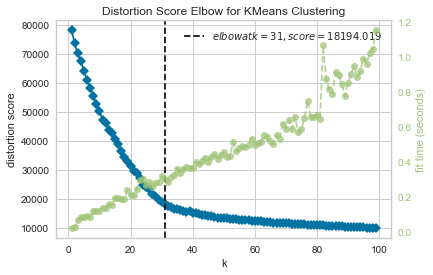

In [18]:
Find_K=Get_K(1, 100,train_data)
#Calling get_k method on our Find_K object
Find_K.get_k_distortion()

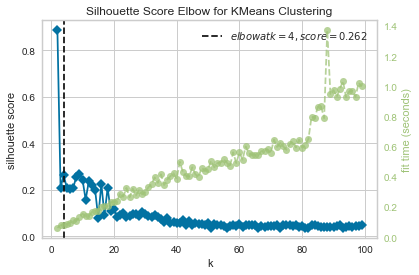

In [19]:
Find_K.get_k_silhouette()

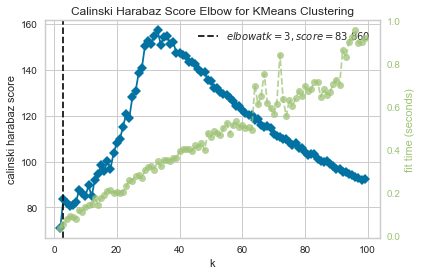

In [31]:
Find_K.get_k_calinski_harabasz()

In [32]:
model = KMeans(algorithm='auto', copy_x=True, init='k-means++', n_clusters=31, max_iter=300, n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
cluster_idx = model.fit_predict(train_data)
collections.Counter(cluster_idx)    
labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Clusters discovered: %d" % n_clusters_)


Clusters discovered: 31


In [33]:
clustered = model.labels_
clustered_series = pd.Series(index = X.index, data = clustered.flatten())
clustered_series_all = pd.Series(index = X.index, data = clustered.flatten())
clustered_series = clustered_series[clustered_series != 1]

In [34]:
cluster_size_limit = 100
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts > 1) & (counts <= cluster_size_limit)]
print("Clusters formed: %d" % len(ticker_count_reduced))
print("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed: 4
Pairs to evaluate: 16186


In [35]:
X_tsne = TSNE(learning_rate = 1000, perplexity = 25, random_state = 1337).fit_transform(X)

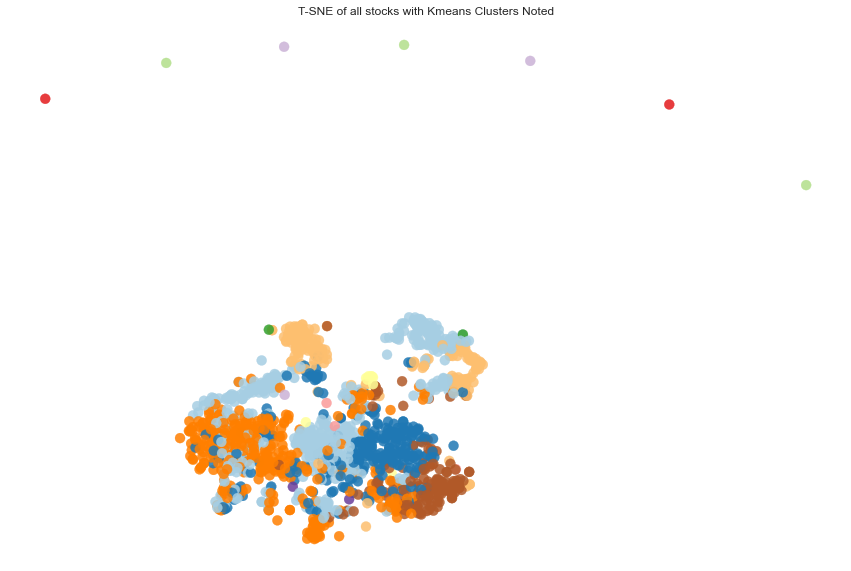

In [36]:
plt.figure(1, facecolor = 'white', figsize = (15, 10))
plt.clf()
plt.axis('off')

plt.scatter(X_tsne[(labels!=-1), 0], X_tsne[(labels!=-1), 1], s = 100, alpha = 0.85, c = labels[labels!=-1], cmap = cm.Paired)
plt.scatter(X_tsne[(clustered_series_all==-1).values, 0], X_tsne[(clustered_series_all==-1).values, 1], s = 100, alpha = 0.05)
plt.title('T-SNE of all stocks with Kmeans Clusters Noted')
plt.savefig('T-SNE_plot_for_stock_clusters.png')
plt.show()

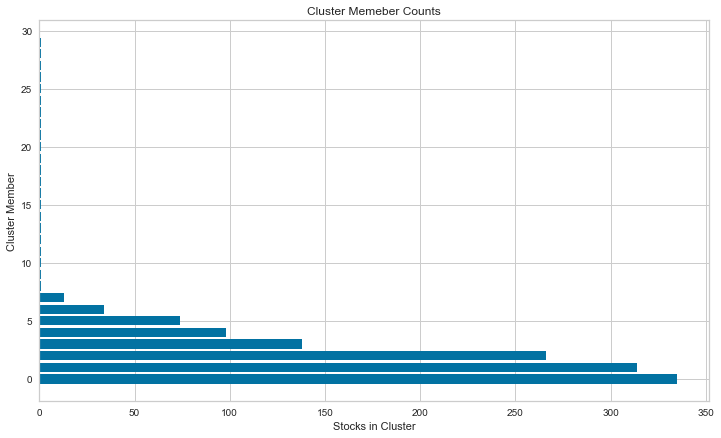

In [37]:
plt.figure(figsize = (12, 7))
plt.barh(range(len(clustered_series.value_counts())), clustered_series.value_counts())
plt.title("Cluster Memeber Counts")
plt.xlabel('Stocks in Cluster')
plt.ylabel("Cluster Member")
plt.savefig('cluster_member_counts.png')
plt.show()

In [38]:
counts = clustered_series.value_counts()
clusters_viz_list = list(counts[(counts < 100) & (counts > 1)].index)[::-1]
print(clusters_viz_list)

[27, 18, 15, 16]


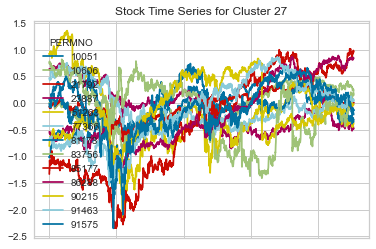

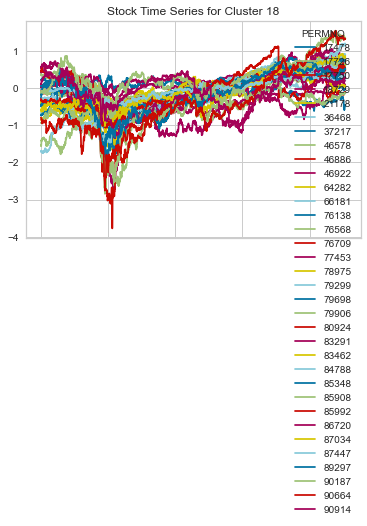

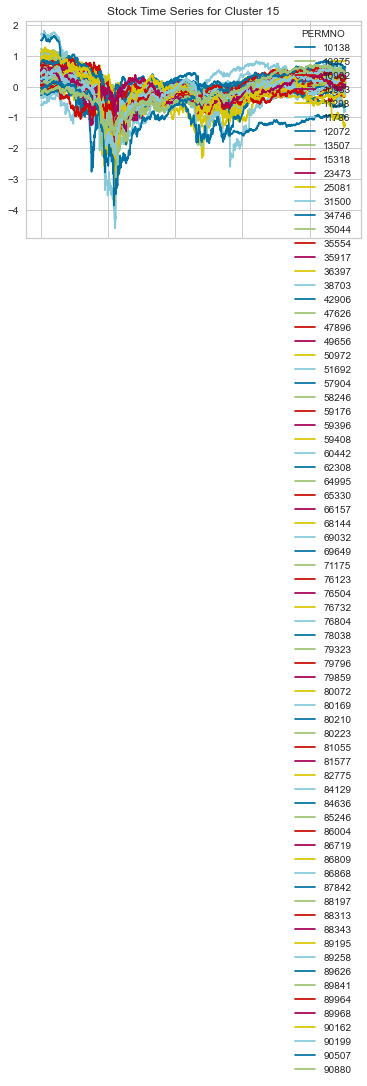

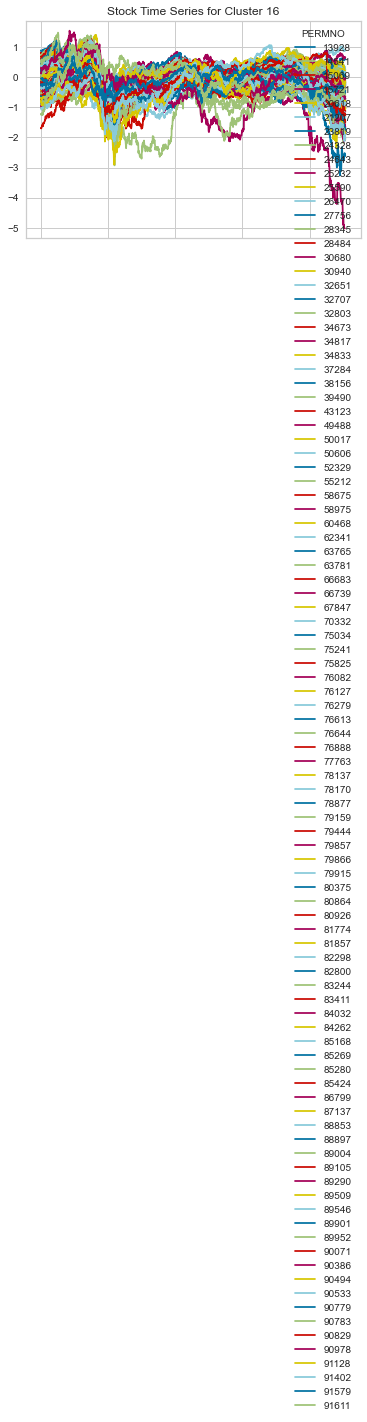

In [39]:
for c in clusters_viz_list:
    stocks = list(clustered_series[clustered_series==c].index)
    means = np.log(stock_price.loc[stocks,].T.mean())
    data = np.log(stock_price.loc[stocks,]).T.sub(means)
    data.plot(title='Stock Time Series for Cluster %d' % c)
    plt.savefig('stock_price_clsuter_'+str(c)+'.png')
    plt.show()